In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.manifold import TSNE
np.random.seed(42)
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X = np.concatenate([X_train, X_test]).reshape(-1, 28*28) / 255.0
y = np.concatenate([y_train, y_test])

print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


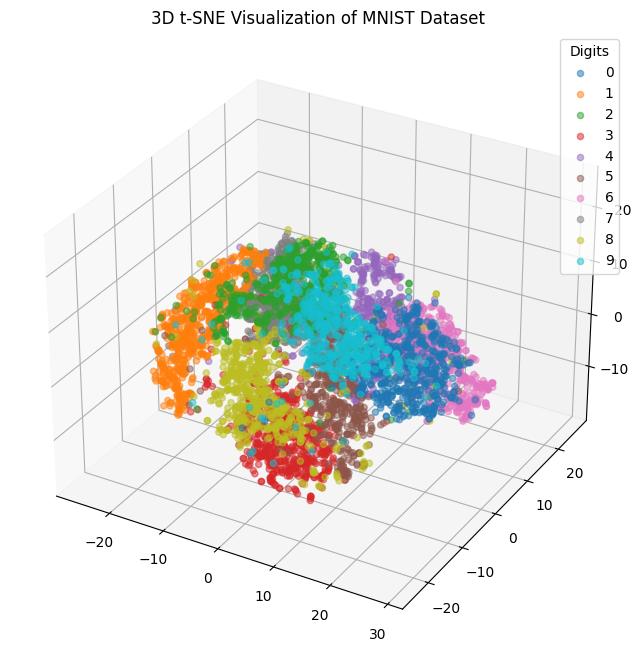

In [8]:
sample_indices = np.random.choice(len(X), 6000, replace=False)
X_sample = X[sample_indices]
y_sample = y[sample_indices]

tsne = TSNE(n_components=3, perplexity=25, random_state=123)
X_tsne = tsne.fit_transform(X_sample)

fig = plt.figure(figsize=(10, 8))
pl = fig.add_subplot(111, projection='3d')

for i, digit in enumerate(np.unique(y)):
    digit_mask = y_sample == digit
    pl.scatter(X_tsne[digit_mask, 0], X_tsne[digit_mask, 1], X_tsne[digit_mask, 2], c=colors[i], label=i, alpha=0.5)

pl.set_title("3D t-SNE Visualization of MNIST Dataset")
pl.legend(title="Digits", loc="best")
plt.show()